In [1]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys  
sys.path.insert(0, '/home/HPC/camontan/turchetti_paper/')

from clustering_scripts import *

In [2]:
EXTENT = (0, 0.45, 0, 0.45)

In [3]:
f_stab = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_stability_stability.h5", "r")
f_lyap = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_tangent_map_tangent_stuff.h5", "r")
f_rem = h5py.File("/home/HPC/camontan/turchetti_paper/output/focused_scan/focused_scan_analysis_type_rem_rem.h5", "r")

In [4]:
data = f_stab["stability"][:]
mask = np.log10(data)==8

In [5]:
ground_truth_data = f_lyap['100000000/lyapunov_error'][:]
ground_truth_data[np.isinf(ground_truth_data)] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[mask & (np.isnan(ground_truth_data))] = np.nanmax(ground_truth_data[~np.isinf(ground_truth_data)])
ground_truth_data[~mask] = np.nan
ground_truth_data = np.log10(ground_truth_data)

In [6]:
gt_thesh = find_threshold(np.log10(ground_truth_data[mask]))
ground_truth = np.log10(ground_truth_data) > gt_thesh

In [7]:
times = []
lyapunov_data = []

for key in f_lyap.keys():
    times.append(int(key))
    lyapunov_data.append(f_lyap[key]['lyapunov_error'][:])

# sort times and lyapunov data
times, lyapunov_data = zip(*sorted(zip(times, lyapunov_data)))

# convert to numpy arrays
times = np.array(times)
lyapunov_data = np.array(lyapunov_data)

In [8]:
lyapunov_thresholds = []
lyapunov_guesses = []
lyapunov_scores = []
for t, data in zip(times, lyapunov_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    lyapunov_thresholds.append(find_threshold(np.log10(data[mask])))
    guess = (np.log10(data) > lyapunov_thresholds[-1])
    lyapunov_guesses.append(guess)
    lyapunov_scores.append(classify_data(ground_truth[mask], guess[mask]))

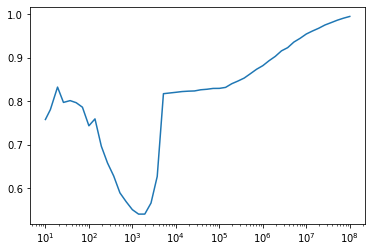

In [9]:
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="accuracy")
plt.xscale("log")

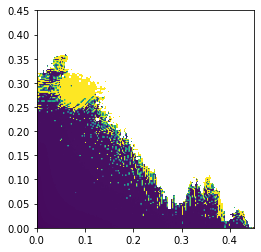

In [10]:
plt.imshow(ground_truth_data.reshape(200, 200), extent=EXTENT, origin="lower")

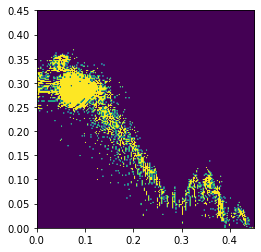

In [11]:
plt.imshow(guess.reshape(200, 200), extent=EXTENT, origin="lower")

Text(0.5, 1.0, 'Lyapunov guess at time 1389')

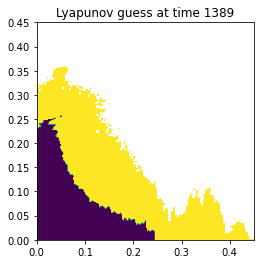

In [12]:
idx = 15
tmp_data = np.asarray(lyapunov_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(200, 200), extent=EXTENT, origin="lower")
plt.title("Lyapunov guess at time {}".format(times[idx]))

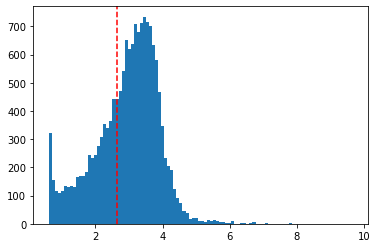

In [13]:
plt.hist(np.log10(lyapunov_data[idx][mask].flatten()), bins=100, label="t = {}".format(times[idx]))
plt.axvline(lyapunov_thresholds[idx], color="red", linestyle="--", label="threshold")

In [14]:
f_lyap[key].keys()

<KeysViewHDF5 ['fli_base_px', 'fli_base_py', 'fli_base_x', 'fli_base_y', 'gali', 'lyapunov_error']>

In [15]:
times = []
fli_x_data = []

for key in f_lyap.keys():
    times.append(int(key))
    fli_x_data.append(f_lyap[key]['fli_base_x'][:])

# sort times and lyapunov data
times, fli_x_data = zip(*sorted(zip(times, fli_x_data)))

# convert to numpy arrays
times = np.array(times)
fli_x_data = np.array(fli_x_data)

In [16]:
fli_x_thresholds = []
fli_x_post_data = []
fli_x_guesses = []
fli_x_scores = []
for t, data in zip(times, fli_x_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_x_post_data.append(data)

    fli_x_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_x_thresholds[-1])
    fli_x_guesses.append(guess)
    fli_x_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [17]:
times = []
fli_px_data = []

for key in f_lyap.keys():
    times.append(int(key))
    fli_px_data.append(f_lyap[key]['fli_base_px'][:])

# sort times and lyapunov data
times, fli_px_data = zip(*sorted(zip(times, fli_px_data)))

# convert to numpy arrays
times = np.array(times)
fli_px_data = np.array(fli_px_data)

In [18]:
fli_px_thresholds = []
fli_px_post_data = []
fli_px_guesses = []
fli_px_scores = []
for t, data in zip(times, fli_px_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_px_post_data.append(data)

    fli_px_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_px_thresholds[-1])
    fli_px_guesses.append(guess)
    fli_px_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [19]:
times = []
fli_y_data = []

for key in f_lyap.keys():
    times.append(int(key))
    fli_y_data.append(f_lyap[key]['fli_base_y'][:])

# sort times and lyapunov data
times, fli_y_data = zip(*sorted(zip(times, fli_y_data)))

# convert to numpy arrays
times = np.array(times)
fli_y_data = np.array(fli_y_data)

In [20]:
fli_y_thresholds = []
fli_y_post_data = []
fli_y_guesses = []
fli_y_scores = []
for t, data in zip(times, fli_y_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_y_post_data.append(data)

    fli_y_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_y_thresholds[-1])
    fli_y_guesses.append(guess)
    fli_y_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [21]:
times = []
fli_py_data = []

for key in f_lyap.keys():
    times.append(int(key))
    fli_py_data.append(f_lyap[key]['fli_base_py'][:])

# sort times and lyapunov data
times, fli_py_data = zip(*sorted(zip(times, fli_py_data)))

# convert to numpy arrays
times = np.array(times)
fli_py_data = np.array(fli_py_data)

In [22]:
fli_py_thresholds = []
fli_py_post_data = []
fli_py_guesses = []
fli_py_scores = []
for t, data in zip(times, fli_py_data):
    data[mask & (np.isnan(data))] = np.nanmax(data[mask])
    # data = np.log10(data)
    data[mask & np.isinf(data)] = np.nanmax(data[~np.isinf(data)])
    fli_py_post_data.append(data)

    fli_py_thresholds.append(find_threshold(data[mask]))
    guess = (data > fli_py_thresholds[-1])
    fli_py_guesses.append(guess)
    fli_py_scores.append(classify_data(ground_truth[mask], guess[mask]))

In [23]:
times = []
gali_data = []

for key in f_lyap.keys():
    times.append(int(key))
    gali_data.append(f_lyap[key]['gali'][:])

# sort times and lyapunov data
times, gali_data = zip(*sorted(zip(times, gali_data)))

# convert to numpy arrays
times = np.array(times)
gali_data = np.array(gali_data)

In [24]:
gali_thresholds = []
gali_post_data = []
gali_guesses = []
gali_scores = []
for t, data in zip(times, gali_data):
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data = np.log10(data)
    data[mask & np.isnan(data)] = np.nanmin(data[~np.isinf(data)])
    data[mask & np.isinf(data)] = np.nanmin(data[~np.isinf(data)])
    gali_post_data.append(data)

    gali_thresholds.append(find_threshold(data[mask]))
    guess = (data < gali_thresholds[-1])
    gali_guesses.append(guess)
    gali_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/748721776.py:7: RuntimeWarning: divide by zero encountered in log10
  data = np.log1

Text(0.5, 1.0, 'FLI x at t = 1389')

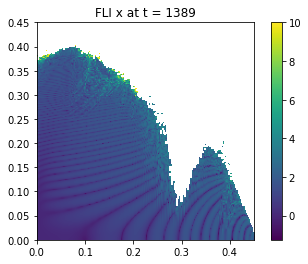

In [45]:
plt.imshow(fli_x_data[15].reshape(200, 200), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI x at t = {}".format(times[15]))

Text(0.5, 1.0, 'FLI px at t = 1389')

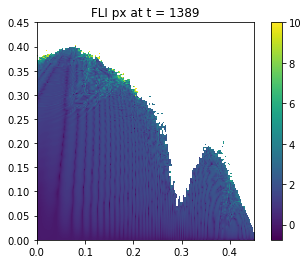

In [47]:
plt.imshow(fli_px_data[15].reshape(200, 200), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI px at t = {}".format(times[15]))

Text(0.5, 1.0, 'FLI y at t = 1389')

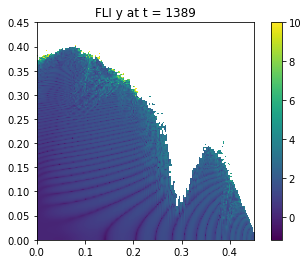

In [48]:
plt.imshow(fli_y_data[15].reshape(200, 200), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI y at t = {}".format(times[15]))

In [56]:
times

array([       10,        13,        19,        26,        37,        51,
              71,       100,       138,       193,       268,       372,
             517,       719,      1000,      1389,      1930,      2682,
            3727,      5179,      7196,     10000,     13894,     19306,
           26826,     37275,     51794,     71968,    100000,    138949,
          193069,    268269,    372759,    517947,    719685,   1000000,
         1389495,   1930697,   2682695,   3727593,   5179474,   7196856,
        10000000,  13894954,  19306977,  26826957,  37275937,  51794746,
        71968567, 100000000])

Text(0.5, 1.0, 'FLI py at t = 10000')

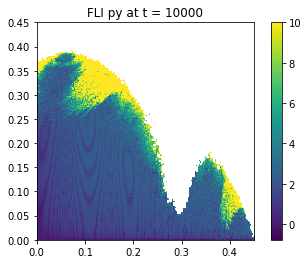

In [63]:
plt.imshow(fli_py_data[21].reshape(200, 200), extent=EXTENT, origin="lower", vmax=10)
plt.colorbar()
plt.title("FLI py at t = {}".format(times[21]))

Text(0.5, 1.0, 'LE at t = 10000')

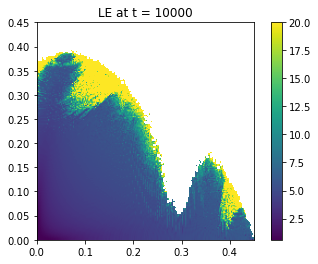

In [62]:
plt.imshow(np.log10(lyapunov_data[21]).reshape(200, 200), extent=EXTENT, origin="lower", vmax=20)
plt.colorbar()
plt.title("LE at t = {}".format(times[21]))

Text(0, 0.5, 'accuracy')

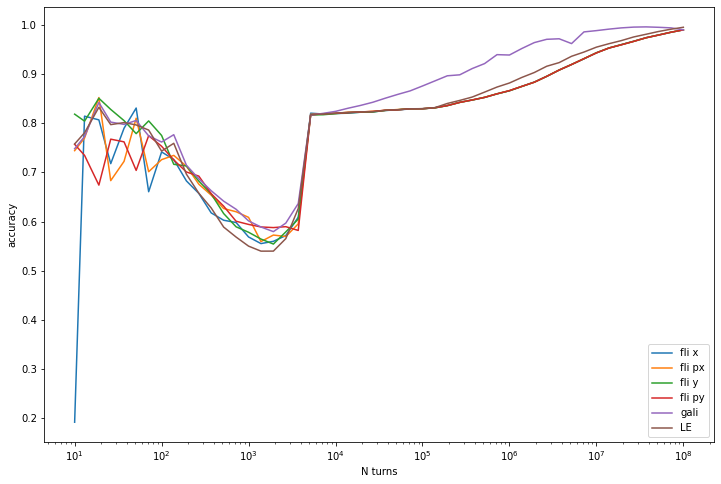

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(times, [s["accuracy"] for s in fli_x_scores], label="fli x")
plt.plot(times, [s["accuracy"] for s in fli_px_scores], label="fli px")
plt.plot(times, [s["accuracy"] for s in fli_y_scores], label="fli y")
plt.plot(times, [s["accuracy"] for s in fli_py_scores], label="fli py")
plt.plot(times, [s["accuracy"] for s in gali_scores], label="gali")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="LE")
plt.xscale("log")

plt.legend()
plt.xlabel("N turns")
plt.ylabel("accuracy")

Text(0.5, 1.0, 'FLI px N = 100000000')

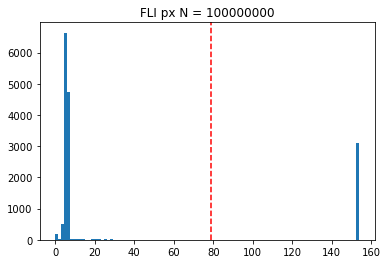

In [65]:
idx = -1
plt.hist(fli_px_post_data[idx][mask], bins=100, label="t = {}".format(times[idx]))
plt.axvline(fli_px_thresholds[idx], color="red", linestyle="--", label="threshold")
plt.title("FLI px N = {}".format(times[idx]))

In [27]:
times = []
rem_data = []

for key in f_rem.keys():
    if key == '0':
        continue
    # if key is not the string of an integer, skip
    if not key.isdigit():
        continue 
    times.append(int(key))
    rem_data.append(
        np.sqrt(
            (f_rem['0']['x'][:] - f_rem[key]['x'][:])**2+
            (f_rem['0']['px'][:] - f_rem[key]['px'][:])**2+
            (f_rem['0']['y'][:] - f_rem[key]['y'][:])**2+
            (f_rem['0']['py'][:] - f_rem[key]['py'][:])**2
        )
    )

# sort times and rem data
times, rem_data = zip(*sorted(zip(times, rem_data)))

# convert to numpy arrays
times = np.array(times)
rem_data = np.array(rem_data)

In [28]:
rem_thresholds = []
rem_post_data = []
rem_guesses = []
rem_scores = []
for t, data in zip(times, rem_data):
    data = np.log10(data)
    data[mask & (np.isnan(data))] = np.nanmin(data[mask])
    data[mask & (np.isinf(data))] = np.nanmin(data[mask & (~np.isinf(data))])
    rem_post_data.append(data)
    rem_thresholds.append(find_threshold(data[mask]))
    guess = (data > rem_thresholds[-1])
    rem_guesses.append(guess)
    rem_scores.append(classify_data(ground_truth[mask], guess[mask]))

/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data = np.log10(data)
/tmp/ipykernel_7670/3754110125.py:6: RuntimeWarning: divide by zero encountered in log10
  data 

Text(0.5, 1.0, 'rem guess at time 100000000')

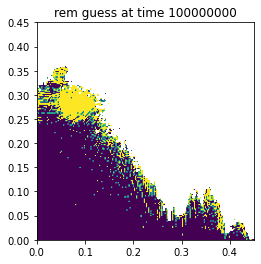

In [29]:
idx = -1
tmp_data = np.asarray(rem_guesses[idx], dtype=float)
tmp_data[~mask] = np.nan
plt.imshow(tmp_data.reshape(200, 200), extent=EXTENT, origin="lower")
plt.title("rem guess at time {}".format(times[idx]))

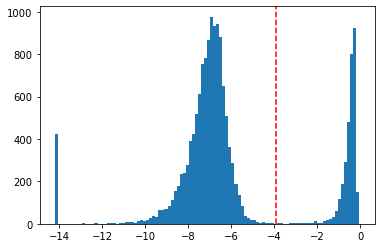

In [30]:
plt.hist(rem_post_data[idx], bins=100, label="t = {}".format(times[idx]))
plt.axvline(rem_thresholds[idx], color="red", linestyle="--", label="threshold")

In [31]:
rem_scores[idx]

{'total': 15684,
 'true_positive': 2985,
 'true_negative': 12117,
 'false_positive': 159,
 'false_negative': 423,
 'accuracy': 0.9628921193573068,
 'precision': 0.9494274809160306,
 'recall': 0.8758802816901409,
 'f1': 0.9111721611721612}

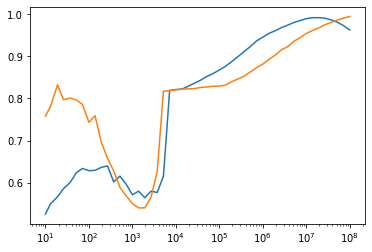

In [32]:
plt.plot(times, [s["accuracy"] for s in rem_scores], label="accuracy")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="accuracy")
plt.xscale("log")

Text(0, 0.5, 'accuracy')

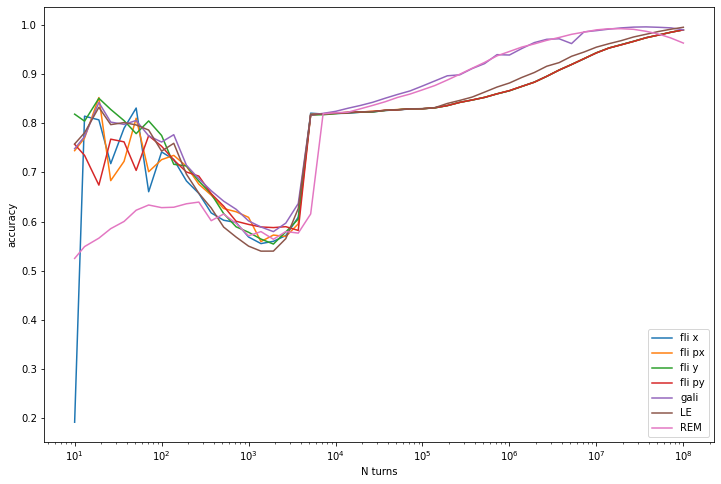

In [50]:
plt.figure(figsize=(12, 8))
plt.plot(times, [s["accuracy"] for s in fli_x_scores], label="fli x")
plt.plot(times, [s["accuracy"] for s in fli_px_scores], label="fli px")
plt.plot(times, [s["accuracy"] for s in fli_y_scores], label="fli y")
plt.plot(times, [s["accuracy"] for s in fli_py_scores], label="fli py")
plt.plot(times, [s["accuracy"] for s in gali_scores], label="gali")
plt.plot(times, [s["accuracy"] for s in lyapunov_scores], label="LE")
plt.plot(times, [s["accuracy"] for s in rem_scores], label="REM")
plt.xscale("log")

plt.legend()
plt.xlabel("N turns")
plt.ylabel("accuracy")

/tmp/ipykernel_7670/2450744138.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(rem_data[-1]).reshape(200,200), extent=EXTENT, origin="lower")


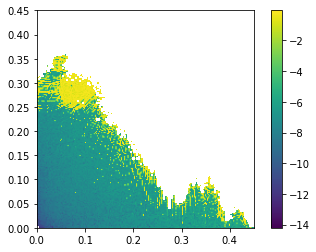

In [34]:
plt.imshow(np.log10(rem_data[-1]).reshape(200,200), extent=EXTENT, origin="lower")

plt.colorbar()

/tmp/ipykernel_7670/3662728481.py:1: RuntimeWarning: divide by zero encountered in log10
  tmp_data = np.log10(rem_data[-1])


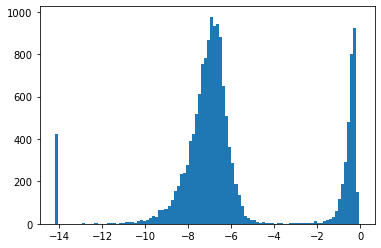

In [35]:
tmp_data = np.log10(rem_data[-1])
tmp_data[np.isnan(tmp_data)] = np.nanmin(tmp_data[~np.isnan(tmp_data)])
tmp_data[np.isinf(tmp_data)] = np.nanmin(tmp_data[~np.isinf(tmp_data)])
plt.hist(tmp_data[mask], bins=100);